In [1]:
##pip install lifelines ##安装生存分析包

In [3]:
!pip install lifelines -i http://mirrors.aliyun.com/pypi/simple/ --trusted-host mirrors.aliyun.com

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 367.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 311.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 358.0 kB/s eta 0:00:0000:0100:01
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=e9669d02a1a8f9cd5d647908f03b961a042e371a1a3f1222c5f0c3b7a2f74e73
  Stored in directory: /Users/liyongfeng/Library/Caches/pip/wheels/bc/40/31/8bb742dc5073af4851c78fe0be52e04d5d5c948ee20dbc22c9
Successfully built autograd-gamma


In [4]:
##**第1步：软件包引入**重要的软件包的介绍在代码的备注中。

import pandas as pd                ##引入基础分析软件包pandas
import numpy as np                 ##引入基础分析软件包numpy
import matplotlib.pyplot as plt    ##引入绘图软件包
from lifelines import KaplanMeierFitter        ##引入生存分析包-KM生存曲线
from lifelines.statistics import logrank_test  ##引入生存分析包-logrank检验
from lifelines import NelsonAalenFitter        ##引入生存分析包-风险曲线
from lifelines import CoxPHFitter              ##引入生存分析包-COX模型

In [5]:
##**第二步：将数据转换成生存分析所需要格式**
data_survival = pd.read_csv('./Data/input_survival.csv', sep=',', encoding = 'GBK', index_col=False)
data_survival = data_survival[(data_survival['Publish_period']<=90)].reset_index(drop=True)
data_survival = data_survival.drop(['Departure_Date','End_Date','Car_id'],axis=1) ##删除不需要的字段
data_survival.head()

,Publish_period,Distance_travelled,Color,N_Photos,Price,N_Inquires,is_sold
0,10,61763,White,27,110000,34,0
1,4,61763,White,27,90000,34,1
2,28,60000,Silver,28,110000,53,1
3,17,74687,White,27,130000,34,0
4,7,74687,White,27,110000,34,1


In [6]:
data_survival.shape

(11194, 7)

In [19]:
data_survival.Color.value_counts()

Color
White     6322
Silver    2919
Black     1755
Brown      198
Name: count, dtype: int64

In [7]:
##**第三步：基于分析需要对数据进行处理**
df = pd.get_dummies(data_survival, drop_first=True, columns=['Color']) 
df.head()

,Publish_period,Distance_travelled,N_Photos,Price,N_Inquires,is_sold,Color_Brown,Color_Silver,Color_White
0,10,61763,27,110000,34,0,False,False,True
1,4,61763,27,90000,34,1,False,False,True
2,28,60000,28,110000,53,1,False,True,False
3,17,74687,27,130000,34,0,False,False,True
4,7,74687,27,110000,34,1,False,False,True


Text(0.5, 0, 'day $t$')

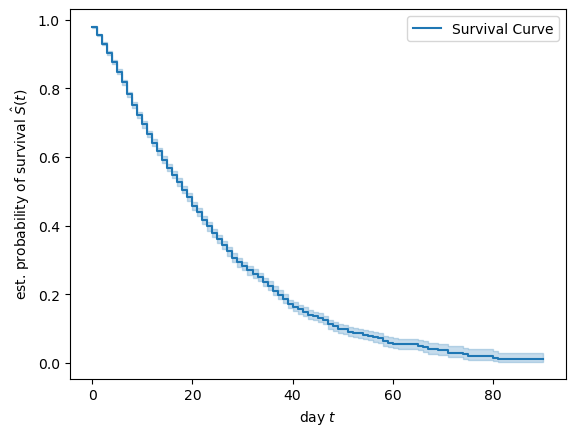

In [8]:
##**第四步：绘制二手车随时间变化的整体生存曲线
kmf = KaplanMeierFitter()
T = df["Publish_period"]  ##T代表生存时长
E = df["is_sold"]         ##E代表关注事件（终点事件）
kmf.fit(T, event_observed=E,label='Survival Curve')

#kmf.plot(show_censors=True,ci_show=False) ##绘图，展示删失数据，不展示置信区间
kmf.plot()
plt.xlim()
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("day $t$")

In [11]:
data_survival[(data_survival['Publish_period']<=20) & data_survival.is_sold == 1].shape

(4620, 7)

In [14]:
data_survival[data_survival.is_sold == 0].describe()

,Publish_period,Distance_travelled,N_Photos,Price,N_Inquires,is_sold
count,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.0
mean,13.748325,43832.954765,30.841772,90876.954579,12.311057,0.0
std,11.280184,14050.850222,4.461372,15387.828522,14.045006,0.0
min,0.000000,1687.000000,4.000000,45000.000000,1.000000,0.0
25%,5.000000,34580.500000,30.000000,80000.000000,5.000000,0.0
50%,11.000000,44208.000000,30.000000,90000.000000,9.000000,0.0
75%,20.000000,53479.750000,31.000000,100000.000000,15.000000,0.0
max,90.000000,90663.000000,111.000000,210000.000000,306.000000,0.0


In [15]:
data_survival[data_survival.is_sold == 1].describe()

,Publish_period,Distance_travelled,N_Photos,Price,N_Inquires,is_sold
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.0
mean,12.975610,43517.141017,30.735314,57678.461182,11.790965,1.0
std,10.828492,14103.229035,4.315928,22132.347452,13.731996,0.0
min,0.000000,1687.000000,4.000000,10992.000000,1.000000,1.0
25%,5.000000,34202.000000,29.000000,43000.000000,4.000000,1.0
50%,10.000000,43804.500000,30.000000,58000.000000,8.000000,1.0
75%,19.000000,53245.500000,31.000000,72000.000000,14.000000,1.0
max,81.000000,90663.000000,111.000000,190000.000000,306.000000,1.0


Text(0.5, 0, 'day $t$')

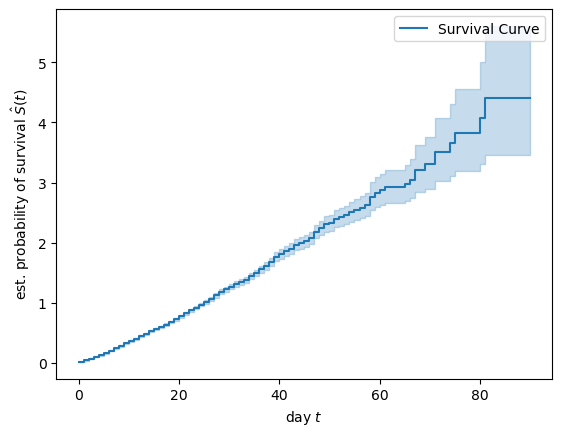

In [9]:
naf=NelsonAalenFitter()

T = df["Publish_period"]  ##T代表生存时长
E = df["is_sold"]         ##E代表关注事件（终点事件）
naf.fit(T, event_observed=E,label='Survival Curve')

#kmf.plot(show_censors=True,ci_show=False) ##绘图，展示删失数据，不展示置信区间
naf.plot()
plt.xlim()
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("day $t$")

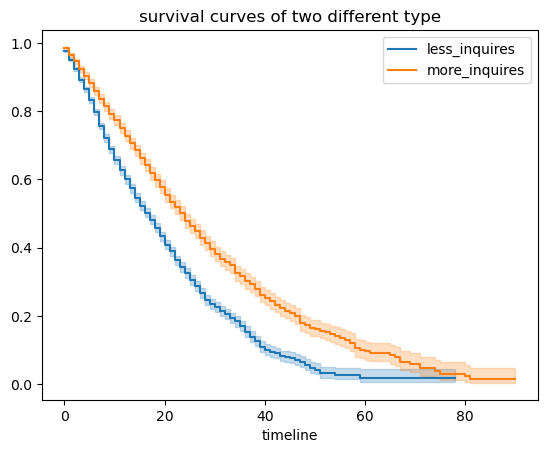

In [12]:
##**第五步：绘制不同照片数量二手车随时间变化的生存曲线

avg_inquires=np.mean(df['N_Inquires'])

df_less_inquires=df[(df['N_Inquires']<avg_inquires)]
df_more_inquires=df[(df['N_Inquires']>avg_inquires)]


ax = plt.subplot(111)
kmf=KaplanMeierFitter()

kmf.fit(df_less_inquires['Publish_period'], 
        event_observed=df_less_inquires['is_sold'], 
        label="less_inquires") 

ax = kmf.plot(ax=ax) 
kmf.fit(df_more_inquires['Publish_period'], 
        event_observed=df_more_inquires['is_sold'], 
        label="more_inquires") 

ax = kmf.plot(ax=ax) 

plt.title("survival curves of two different type");

In [13]:
##**第六步：验证不同访问次数二手车生存曲线是否有显著差异
T1 = df_less_inquires["Publish_period"]
E1 = df_less_inquires["is_sold"]

T2 = df_more_inquires["Publish_period"]
E2 = df_more_inquires["is_sold"]

results = logrank_test(T1, T2, 
                       event_observed_A=E1, 
                       event_observed_B=E2)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         241.48 <0.005    178.48

In [17]:
CoxPHFitter.fit?

Signature:
CoxPHFitter.fit(
    self,
    df: 'pd.DataFrame',
    duration_col: 'Optional[str]' = None,
    event_col: 'Optional[str]' = None,
    show_progress: 'bool' = False,
    initial_point: 'Optional[ndarray]' = None,
    strata: 'Optional[Union[str, List[str]]]' = None,
    weights_col: 'Optional[str]' = None,
    cluster_col: 'Optional[str]' = None,
    robust: 'bool' = False,
    batch_mode: 'Optional[bool]' = None,
    timeline: 'Optional[Iterator]' = None,
    formula: 'str' = None,
    entry_col: 'str' = None,
    fit_options: 'Optional[dict]' = None,
) -> 'CoxPHFitter'
Docstring:
Fit the Cox proportional hazard model to a right-censored dataset. Alias of `fit_right_censoring`.

Parameters
----------
df: DataFrame
    a Pandas DataFrame with necessary columns `duration_col` and
    `event_col` (see below), covariates columns, and special columns (weights, strata).
    `duration_col` refers to
    the lifetimes of the subjects. `event_col` refers to whether
    the 'death' 

Iteration 1: norm_delta = 9.75e-01, step_size = 0.9500, log_lik = -48763.10572, newton_decrement = 1.80e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 3.72e-01, step_size = 0.9500, log_lik = -46784.23319, newton_decrement = 1.64e+02, seconds_since_start = 0.0
Iteration 3: norm_delta = 9.32e-02, step_size = 0.9500, log_lik = -46606.21342, newton_decrement = 1.05e+01, seconds_since_start = 0.0
Iteration 4: norm_delta = 1.11e-02, step_size = 1.0000, log_lik = -46594.96532, newton_decrement = 1.79e-01, seconds_since_start = 0.0
Iteration 5: norm_delta = 3.51e-04, step_size = 1.0000, log_lik = -46594.78262, newton_decrement = 1.68e-04, seconds_since_start = 0.0
Iteration 6: norm_delta = 3.57e-07, step_size = 1.0000, log_lik = -46594.78245, newton_decrement = 1.72e-10, seconds_since_start = 0.1
Convergence success after 6 iterations.


<lifelines.CoxPHFitter: fitted with 11194 total observations, 5372 right-censored observations>
             duration col = 'Publish_period'
                event col = 'is_sold'
      baseline estimation = breslow
   number of observations = 11194
number of events observed = 5822
   partial log-likelihood = -46594.78
         time fit was run = 2024-07-11 09:46:48 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
Distance_travelled  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
N_Photos            -0.03       0.97       0.01            -0.04            -0.02                 0.96                 0.98
Price               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
N_Inquires          -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
Color_Brown         -1.00       0.37       0.15            -1.29            -0.71                 0.28                 0.49
Color_Silver         1.10       3.01       0.05             1.00             1.21                 2.71                 3.34
Color_White          2.10       8.19       0.05             1.99             2.21                 7.35                 9.12

                     cmp to      z      p   -log2(p)
covariate                                           
Distance_travelled     0.00 -10.04 <0.005      76.42
N_Photos               0.00  -5.63 <0.005      25.69
Price                  0.00 -46.36 <0.005        inf
N_Inquires             0.00  -7.64 <0.005      45.43
Color_Brown            0.00  -6.74 <0.005      35.84
Color_Silver           0.00  20.69 <0.005     313.39
Color_White            0.00  38.25 <0.005        inf
---
Concordance = 0.69
Partial AIC = 93203.56
log-likelihood ratio test = 4336.65 on 7 df
-log2(p) of ll-ratio test = inf

<Axes: xlabel='log(HR) (95% CI)'>

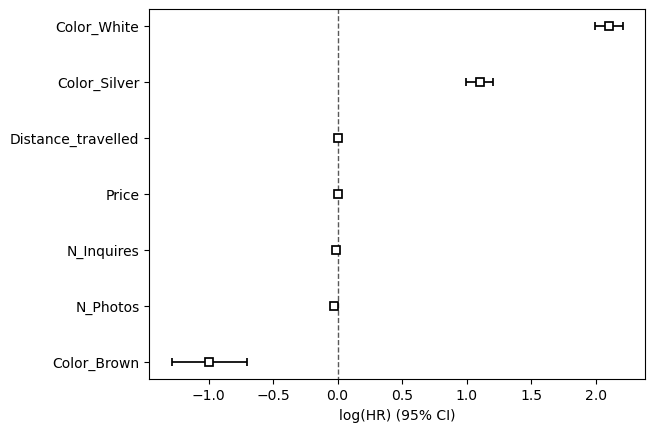

In [18]:
##**第七步：引入cox模型对特征进行解释
cph = CoxPHFitter()
cph.fit(df, duration_col='Publish_period', event_col='is_sold',show_progress=True)
cph.print_summary() 
cph.plot() ##图形对特征进行解释

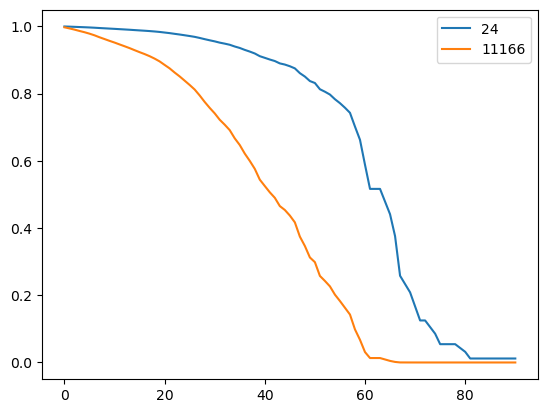

In [20]:
##**第七步：对个体生存函数进行预测
X = df.drop(['Publish_period','is_sold'],axis=1)  ##筛选特征集合，剔除销售时间与事件结局数据
surv_hat=cph.predict_survival_function(X)

## 抽取任意两个样本，观察预测结果
surv_hat[24].plot(label='24')
surv_hat[11166].plot(label='11166')
plt.legend()

In [22]:
surv_hat.shape

(76, 11194)

In [24]:
surv_hat.head(2)

,0,1,2,3,4,5,6,7,8,9,...,11184,11185,11186,11187,11188,11189,11190,11191,11192,11193
0.0,0.991962,0.986746,0.997556,0.995738,0.992963,0.999057,0.997424,0.996870,0.993357,0.999794,...,0.989176,0.938709,0.983921,0.945953,0.979824,0.960613,0.975414,0.950919,0.981153,0.970527
1.0,0.982682,0.971529,0.994717,0.990796,0.984828,0.997959,0.994431,0.993236,0.985674,0.999553,...,0.976715,0.872037,0.965518,0.886670,0.956836,0.916687,0.947538,0.896778,0.959647,0.937290


In [25]:
surv_hat.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,11184,11185,11186,11187,11188,11189,11190,11191,11192,11193
83.0,1.600907e-36,6.552616e-60,1.403896e-11,1.132626e-19,4.734906e-32,0.000065,3.606768e-12,1.239314e-14,2.719833e-30,0.121564,...,5.317055e-49,2.796583e-281,1.258896e-72,3.503894e-247,3.920274e-91,5.773445e-179,3.835252e-111,5.888708e-224,4.013318e-85,2.012762e-133
90.0,1.600907e-36,6.552616e-60,1.403896e-11,1.132626e-19,4.734906e-32,0.000065,3.606768e-12,1.239314e-14,2.719833e-30,0.121564,...,5.317055e-49,2.796583e-281,1.258896e-72,3.503894e-247,3.920274e-91,5.773445e-179,3.835252e-111,5.888708e-224,4.013318e-85,2.012762e-133


In [27]:
##**第八步：基于预测生存函数寻找最优价格策略
## step 8-1：创建获取预测在售天数函数
def predict_day(surv_hat):
    days = np.zeros(surv_hat.shape[1])
    prob = np.zeros(surv_hat.shape[1])
    j = surv_hat.shape[1]
    for i in range(1,surv_hat.shape[1]):
        prob[i-1] = surv_hat[surv_hat[i-1] >= 0.5][i-1].min()
        prob[j-1] = surv_hat[surv_hat[j-1] >= 0.5][j-1].min()
        days[i-1] = surv_hat[surv_hat[i-1] == prob[i-1]].index.values.min()
        days[j-1] = surv_hat[surv_hat[j-1] == prob[j-1]].index.values.min()
        ##以预测半衰期作为预测在售天数
    return prob,days   

def is_sold(data):
    y = np.zeros(data.shape[0])   
    for i in range(1,data.shape[0]):
        if data[i-1]>=0.6:
            y[i-1]=0
        else:
            y[i-1]=1
    return y

def is_sold_by_day(data):
    pass

## step 8-2：创建利润函数
def profit(data, predict_days,sold_tag):
    d = list(predict_days) 
    y = list(sold_tag)
    revenue = np.sum(data['Price']*y)
    cost = np.sum(1000*d)
    profit = revenue - cost    
    return profit


## step 8-3：计算不同价格下利润
min_price = df['Price'].values.min()
max_price = df['Price'].values.max()
sp_price = np.linspace(min_price, max_price, 10)
X = df.drop(['Publish_period','is_sold'],axis=1)

profit_list = []
price_list = list(sp_price)
   
for p in price_list:
    X['Price'] = p        
    surv_hat = cph.predict_survival_function(X)        
    prob_result,days_result = predict_day(surv_hat)
    sold_result = is_sold(prob_result)
    profit_result = profit(X,days_result,sold_result)
    profit_list.append(profit_result)

In [28]:
profit_res = pd.DataFrame({'price': price_list, 'profit': profit_list}) 
profit_res

,price,profit
0,10992.0,3.077530e+07
1,33104.0,2.414041e+08
2,55216.0,4.346117e+08
3,77328.0,6.141523e+08
4,99440.0,7.861689e+08
5,121552.0,9.588454e+08
6,143664.0,1.130883e+09
7,165776.0,1.291533e+09
8,187888.0,1.456057e+09
9,210000.0,1.599042e+09
